<a href="https://colab.research.google.com/github/cbchhaya/springboardml/blob/main/Student_MLE_MiniProject_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [ ]:
#%pip install scikeras


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

2025-07-09 10:00:35.984556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752069636.615809   83409 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752069636.788708   83409 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752069638.347600   83409 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752069638.347626   83409 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752069638.347627   83409 computation_placer.cc:177] computation placer alr

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [ ]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
df = pd.read_csv(DATA_PATH, header=None)

# Assign column names to the DataFrame
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

print(df.shape)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [ ]:
# Do some exploratory analysis. How many rows/columns are there? How are NULL
# values represented? What's the percentrage of positive cases in the dataset?
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Print number of values where income is '>50K'
print(f"Number of positive cases (income > 50K): {df[df['income'].str.strip() == '>50K'].shape[0]}")
print(f"Null values in each column:\n{df.isnull().sum()}")
# Check for null values and handle them if necessary
print(f"Null values in the dataset: {df.isnull().sum().sum()}")



Number of rows: 32561, Number of columns: 15
Number of positive cases (income > 50K): 7841
Null values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Null values in the dataset: 0


In [ ]:
# Find all NULL values and drop them
df = df.dropna()

In [ ]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'].str.strip())


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [ ]:
# Split dataset into training and test sets
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [ ]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.
y_pred_majority = np.zeros_like(y_test)
auc_majority = roc_auc_score(y_test, y_pred_majority)
print(f"AUC score for majority class prediction: {auc_majority}")

AUC score for majority class prediction: 0.5


Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [ ]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.
categorical_features = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country']

# The remaining features are continuous
continuous_features = [
    'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_features),
        ('num', MinMaxScaler(), continuous_features)
    ]
)


# We'll let the pipeline handle the preprocessing, so we don't transform here
# Just use the original split from earlier
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# How many columns will the dataframe have after these columns transformations are applied?
# Fit and transform a sample to see the shape
sample_transformed = preprocessor.fit_transform(X_train)
print(f"Number of columns after transformation: {sample_transformed.shape[1]}")

Number of columns after transformation: 108


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [ ]:
from keras.layers import Input

# Define the Keras model
# Let's start with a simple feedforward neural network
def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Input layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create a Keras classifier
# Create a KerasClassifier wrapper for the model
model = KerasClassifier(model=create_model, input_shape=sample_transformed.shape[1], epochs=10, batch_size=32, verbose=1, random_state=42)

In [ ]:
# Create the scikit-learn pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])


In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

I0000 00:00:1752069669.189300   83409 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:24:00.0, compute capability: 8.6


Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8114 - loss: 0.4024
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8426 - loss: 0.3328
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8490 - loss: 0.3204
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8508 - loss: 0.3137
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8527 - loss: 0.3094
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8541 - loss: 0.3063
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8559 - loss: 0.3036
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8582 - loss: 0.3013
Epoch 9/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8584 - loss: 0.2991
Epoch 10/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8597 - loss: 0.2966


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


131/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-07-09 10:02:09.723088: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC score of the model: 0.7829799577067246
Confusion Matrix:
[[4524  418]
 [ 549 1022]]


<Axes: >

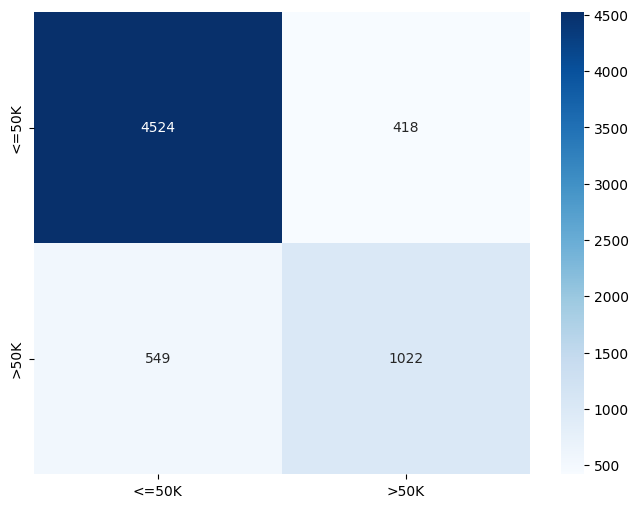

In [ ]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?
y_pred = pipeline.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC score of the model: {auc_score}")

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot it with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


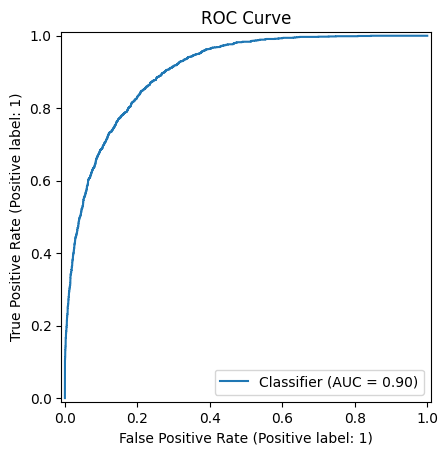

In [ ]:
# Generate an ROC curve for your model.
# Get probabilities for positive class i.e. column 1. Column 0 has the probabilities for the negative class (≤$50K)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title('ROC Curve')
plt.show()

In [ ]:
# Let's see if we can tweak the model to improve the AUC score by changing layers and using multiple epochs
from sklearn.metrics import accuracy_score

def create_model_tweaked(input_shape):
    """Create an improved neural network model with more layers"""
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Input layer
    model.add(Dense(128, activation='relu'))  # Increased number of neurons
    model.add(Dense(64, activation='relu'))   # Added another hidden layer
    model.add(Dense(32, activation='relu'))   # Added another hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model_with_epochs(epochs, model_func=create_model_tweaked, verbose=0):
    """
    Train and evaluate a model with specified number of epochs

    Args:
        epochs (int): Number of training epochs
        model_func (function): Function to create the model
        verbose (int): Verbosity level for training

    Returns:
        dict: Dictionary containing AUC score, accuracy, and other metrics
    """
    # Create model with specified epochs
    model = KerasClassifier(
        model=model_func,
        input_shape=sample_transformed.shape[1],
        epochs=epochs,
        batch_size=32,
        verbose=verbose,
        random_state=42  # Ensure reproducibility
    )

    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Fit the model
    print(f"Training model with {epochs} epochs...")
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Epochs: {epochs} | AUC: {auc_score:.4f} | Accuracy: {accuracy:.4f}")

    return {
        'epochs': epochs,
        'auc_score': auc_score,
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'confusion_matrix': conf_matrix,
        'pipeline': pipeline
    }

# Test with multiple epoch values
epoch_values = [10, 20, 50]
results = []

print("=" * 60)
print("TRAINING MODELS WITH DIFFERENT EPOCH VALUES")
print("=" * 60)

for epochs in epoch_values:
    result = evaluate_model_with_epochs(epochs, verbose=1)
    results.append(result)
    print("-" * 40)

# Extract metrics for plotting
epochs_list = [r['epochs'] for r in results]
auc_scores = [r['auc_score'] for r in results]
accuracies = [r['accuracy'] for r in results]

print("\n" + "=" * 60)
print("SUMMARY OF RESULTS")
print("=" * 60)
for i, result in enumerate(results):
    print(f"Epochs: {result['epochs']:2d} | AUC: {result['auc_score']:.4f} | Accuracy: {result['accuracy']:.4f}")


TRAINING MODELS WITH DIFFERENT EPOCH VALUES
Training model with 10 epochs...
Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8065 - loss: 0.3981
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8454 - loss: 0.3293
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8489 - loss: 0.3178
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8527 - loss: 0.3112
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8557 - loss: 0.3063
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8587 - loss: 0.3023
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8605 - loss: 0.2979
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8622 - loss: 0.2932
Epoch 9/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8645 - loss: 0.2889
Epoch 10/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8659 - loss: 0.2840
117/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

2025-07-09 10:03:18.484661: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epochs: 10 | AUC: 0.7789 | Accuracy: 0.8454
----------------------------------------
Training model with 20 epochs...
Epoch 1/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8065 - loss: 0.3981
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8454 - loss: 0.3293
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8489 - loss: 0.3178
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8527 - loss: 0.3112
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8557 - loss: 0.3063
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8587 - loss: 0.3023
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8605 - loss: 0.2979
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8622 - loss: 0.2932
Epoch 9/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8645 - loss: 0.2889
Epoch 10/20
814/814 ━━━━━

2025-07-09 10:05:29.801699: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epochs: 20 | AUC: 0.7624 | Accuracy: 0.8408
----------------------------------------
Training model with 50 epochs...
Epoch 1/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8065 - loss: 0.3981
Epoch 2/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8454 - loss: 0.3293
Epoch 3/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8489 - loss: 0.3178
Epoch 4/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8527 - loss: 0.3112
Epoch 5/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8557 - loss: 0.3063
Epoch 6/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8587 - loss: 0.3023
Epoch 7/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8605 - loss: 0.2979
Epoch 8/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8622 - loss: 0.2932
Epoch 9/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8645 - loss: 0.2889
Epoch 10/50
814/814 ━━━━━━

2025-07-09 10:11:14.412725: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epochs: 50 | AUC: 0.7597 | Accuracy: 0.8346
----------------------------------------

SUMMARY OF RESULTS
Epochs: 10 | AUC: 0.7789 | Accuracy: 0.8454
Epochs: 20 | AUC: 0.7624 | Accuracy: 0.8408
Epochs: 50 | AUC: 0.7597 | Accuracy: 0.8346


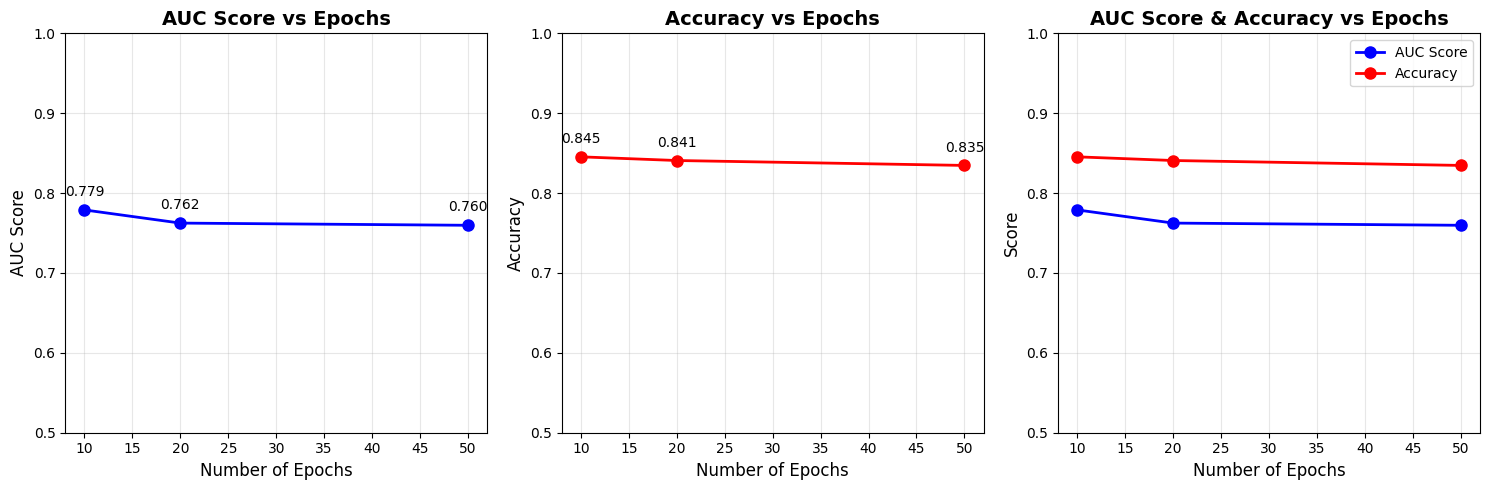


DETAILED COMPARISON
Epochs     AUC Score    Accuracy     AUC Improvement    Accuracy Improvement
--------------------------------------------------------------------------------
10         0.7789       0.8454        +0.00%            +0.00%
20         0.7624       0.8408        -1.65%            -0.46%
50         0.7597       0.8346        -1.92%            -1.07%

Best AUC Score: 0.7789 at 10 epochs
Best Accuracy: 0.8454 at 10 epochs


In [ ]:
# Plot the results
plt.figure(figsize=(15, 5))

# Plot 1: AUC scores vs Epochs
plt.subplot(1, 3, 1)
plt.plot(epochs_list, auc_scores, 'bo-', linewidth=2, markersize=8)
plt.title('AUC Score vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('AUC Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)
for i, (x, y) in enumerate(zip(epochs_list, auc_scores)):
    plt.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot 2: Accuracy vs Epochs
plt.subplot(1, 3, 2)
plt.plot(epochs_list, accuracies, 'ro-', linewidth=2, markersize=8)
plt.title('Accuracy vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)
for i, (x, y) in enumerate(zip(epochs_list, accuracies)):
    plt.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Plot 3: Both metrics together
plt.subplot(1, 3, 3)
plt.plot(epochs_list, auc_scores, 'bo-', linewidth=2, markersize=8, label='AUC Score')
plt.plot(epochs_list, accuracies, 'ro-', linewidth=2, markersize=8, label='Accuracy')
plt.title('AUC Score & Accuracy vs Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\n" + "=" * 80)
print("DETAILED COMPARISON")
print("=" * 80)
print(f"{'Epochs':<10} {'AUC Score':<12} {'Accuracy':<12} {'AUC Improvement':<18} {'Accuracy Improvement':<20}")
print("-" * 80)


for i, result in enumerate(results):
    auc_improvement = (result['auc_score'] - baseline_auc) * 100
    acc_improvement = (result['accuracy'] - baseline_acc) * 100

    print(f"{result['epochs']:<10} {result['auc_score']:<12.4f} {result['accuracy']:<12.4f} "
          f"{auc_improvement:+6.2f}%{'':<10} {acc_improvement:+6.2f}%")

# Find the best performing model
best_auc_idx = max(range(len(results)), key=lambda i: results[i]['auc_score'])
best_acc_idx = max(range(len(results)), key=lambda i: results[i]['accuracy'])

baseline_auc = results[best_auc_idx]['auc_score']
baseline_acc = results[best_acc_idx]['accuracy']

print(f"\nBest AUC Score: {results[best_auc_idx]['auc_score']:.4f} at {results[best_auc_idx]['epochs']} epochs")
print(f"Best Accuracy: {results[best_acc_idx]['accuracy']:.4f} at {results[best_acc_idx]['epochs']} epochs")

# Advanced Model Architecture Experimentation

Now that we've tested different epoch values, let's systematically explore various aspects of neural network design to further improve our model performance. We'll experiment with:

1. **Different Network Architectures** - varying layer sizes and depths
2. **Alternative Activation Functions** - beyond ReLU
3. **Different Optimizers** - exploring alternatives to Adam


In [ ]:
# Import additional layers and functions for advanced experiments
from keras.layers import Dropout, LeakyReLU
from keras.optimizers import RMSprop, AdamW
from keras.regularizers import l1, l2, l1_l2
import time

# Function to create different architectures
def create_architecture_models():
    """Define different neural network architectures to test"""

    def create_wide_model(input_shape):
        """Wider network - more neurons per layer"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_deep_model(input_shape):
        """Deeper network - more layers"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_funnel_model(input_shape):
        """Funnel architecture - gradually decreasing layer sizes"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_consistent_model(input_shape):
        """Consistent width - same number of neurons across layers"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    return {
        'wide': create_wide_model,
        'deep': create_deep_model,
        'funnel': create_funnel_model,
        'consistent': create_consistent_model,
        'baseline': create_model_tweaked  # Our previous best model
    }

In [ ]:
# Function to create models with different activation functions
def create_activation_models():
    """Define models with different activation functions"""

    def create_leaky_relu_model(input_shape):
        """Model with Leaky ReLU activation"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(64))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(32))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_elu_model(input_shape):
        """Model with ELU activation"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='elu'))
        model.add(Dense(64, activation='elu'))
        model.add(Dense(32, activation='elu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_swish_model(input_shape):
        """Model with Swish activation"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='swish'))
        model.add(Dense(64, activation='swish'))
        model.add(Dense(32, activation='swish'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_tanh_model(input_shape):
        """Model with Tanh activation"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='tanh'))
        model.add(Dense(64, activation='tanh'))
        model.add(Dense(32, activation='tanh'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    return {
        'relu': create_model_tweaked,  # Baseline
        'leaky_relu': create_leaky_relu_model,
        'elu': create_elu_model,
        'swish': create_swish_model,
        'tanh': create_tanh_model
    }

In [ ]:
# Function to create models with different optimizers
def create_optimizer_models():
    """Define models with different optimizers"""

    def create_rmsprop_model(input_shape):
        """Model with RMSprop optimizer"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=RMSprop(learning_rate=0.001),
                     loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_adamw_model(input_shape):
        """Model with AdamW optimizer"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=AdamW(learning_rate=0.001),
                     loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_adam_lr001_model(input_shape):
        """Model with Adam optimizer and lower learning rate"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam',
                     loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def create_adam_lr01_model(input_shape):
        """Model with Adam optimizer and higher learning rate"""
        model = Sequential()
        model.add(Input(shape=(input_shape,)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss='binary_crossentropy', metrics=['accuracy'])
        return model

    return {
        'adam_default': create_model_tweaked,  # Baseline
        'rmsprop': create_rmsprop_model,
        'adamw': create_adamw_model,
        'adam_lr_0.001': create_adam_lr001_model,
        'adam_lr_0.01': create_adam_lr01_model
    }

In [ ]:
# Enhanced evaluation function for systematic experiments
def evaluate_model_systematically(model_func, model_name, epochs=20, verbose=0):
    """
    Enhanced evaluation function that includes timing and detailed metrics

    Args:
        model_func: Function to create the model
        model_name: Name/description of the model
        epochs: Number of training epochs
        verbose: Verbosity level for training

    Returns:
        dict: Comprehensive results including timing and metrics
    """
    print(f"Evaluating {model_name}...")
    start_time = time.time()

    # Create model
    model = KerasClassifier(
        model=model_func,
        input_shape=sample_transformed.shape[1],
        epochs=epochs,
        batch_size=32,
        verbose=verbose,
        random_state=42
    )

    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Additional metrics
    from sklearn.metrics import precision_score, recall_score, f1_score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Training time
    training_time = time.time() - start_time

    print(f"{model_name}: AUC={auc_score:.4f}, Acc={accuracy:.4f}, Time={training_time:.1f}s")

    return {
        'name': model_name,
        'auc_score': auc_score,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': training_time,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'pipeline': pipeline
    }

In [ ]:
# Experiment 1: Test Different Architectures
print("=" * 80)
print("EXPERIMENT 1: TESTING DIFFERENT NETWORK ARCHITECTURES")
print("=" * 80)

architecture_models = create_architecture_models()
architecture_results = []

for arch_name, model_func in architecture_models.items():
    try:
        result = evaluate_model_systematically(
            model_func,
            f"Architecture: {arch_name}",
            epochs=10, # 10 epochs because that had the best accuracy/AUC score previously
            verbose=0
        )
        architecture_results.append(result)
    except Exception as e:
        print(f"Error with {arch_name}: {str(e)}")
        continue
    print("-" * 40)

# Sort by AUC score
architecture_results.sort(key=lambda x: x['auc_score'], reverse=True)

print("\nARCHITECTURE RESULTS RANKED BY AUC SCORE:")
print(f"{'Rank':<4} {'Architecture':<15} {'AUC':<8} {'Accuracy':<8} {'F1':<8} {'Time (s)':<8}")
print("-" * 65)
for i, result in enumerate(architecture_results, 1):
    arch_name = result['name'].split(': ')[1]
    print(f"{i:<4} {arch_name:<15} {result['auc_score']:.4f}   {result['accuracy']:.4f}   "
          f"{result['f1_score']:.4f}   {result['training_time']:.1f}")

best_architecture = architecture_results[0]['name'].split(': ')[1]
print(f"\nBest Architecture: {best_architecture} with AUC = {architecture_results[0]['auc_score']:.4f}")

EXPERIMENT 1: TESTING DIFFERENT NETWORK ARCHITECTURES
Evaluating Architecture: wide...


2025-07-09 10:12:20.963500: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Architecture: wide: AUC=0.7793, Acc=0.8443, Time=66.0s
----------------------------------------
Evaluating Architecture: deep...


2025-07-09 10:13:57.421760: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Architecture: deep: AUC=0.7656, Acc=0.8455, Time=96.5s
----------------------------------------
Evaluating Architecture: funnel...


2025-07-09 10:15:36.316145: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Architecture: funnel: AUC=0.7497, Acc=0.8409, Time=98.9s
----------------------------------------
Evaluating Architecture: consistent...


2025-07-09 10:16:40.882091: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Architecture: consistent: AUC=0.7750, Acc=0.8480, Time=64.6s
----------------------------------------
Evaluating Architecture: baseline...


2025-07-09 10:17:45.304204: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Architecture: baseline: AUC=0.7789, Acc=0.8454, Time=64.5s
----------------------------------------

ARCHITECTURE RESULTS RANKED BY AUC SCORE:
Rank Architecture    AUC      Accuracy F1       Time (s)
-----------------------------------------------------------------
1    wide            0.7793   0.8443   0.6695   66.0
2    baseline        0.7789   0.8454   0.6699   64.5
3    consistent      0.7750   0.8480   0.6680   64.6
4    deep            0.7656   0.8455   0.6562   96.5
5    funnel          0.7497   0.8409   0.6350   98.9

Best Architecture: wide with AUC = 0.7793


In [ ]:
# Experiment 2: Test Different Activation Functions
print("\n" + "=" * 80)
print("EXPERIMENT 2: TESTING DIFFERENT ACTIVATION FUNCTIONS")
print("=" * 80)

activation_models = create_activation_models()
activation_results = []

for activation_name, model_func in activation_models.items():
    try:
        result = evaluate_model_systematically(
            model_func,
            f"Activation: {activation_name}",
            epochs=10,
            verbose=0
        )
        activation_results.append(result)
    except Exception as e:
        print(f"Error with {activation_name}: {str(e)}")
        continue
    print("-" * 40)

# Sort by AUC score
activation_results.sort(key=lambda x: x['auc_score'], reverse=True)

print("\nACTIVATION FUNCTION RESULTS RANKED BY AUC SCORE:")
print(f"{'Rank':<4} {'Activation':<15} {'AUC':<8} {'Accuracy':<8} {'F1':<8} {'Time (s)':<8}")
print("-" * 65)
for i, result in enumerate(activation_results, 1):
    activation_name = result['name'].split(': ')[1]
    print(f"{i:<4} {activation_name:<15} {result['auc_score']:.4f}   {result['accuracy']:.4f}   "
          f"{result['f1_score']:.4f}   {result['training_time']:.1f}")

best_activation = activation_results[0]['name'].split(': ')[1]
print(f"\nBest Activation Function: {best_activation} with AUC = {activation_results[0]['auc_score']:.4f}")


EXPERIMENT 2: TESTING DIFFERENT ACTIVATION FUNCTIONS
Evaluating Activation: relu...


2025-07-09 10:18:49.106111: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Activation: relu: AUC=0.7789, Acc=0.8454, Time=63.8s
----------------------------------------
Evaluating Activation: leaky_relu...


/mnt/c/Users/cbchh/code/springboard-ml/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-07-09 10:19:52.778815: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Activation: leaky_relu: AUC=0.7802, Acc=0.8446, Time=63.6s
----------------------------------------
Evaluating Activation: elu...


2025-07-09 10:20:53.409022: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Activation: elu: AUC=0.7907, Acc=0.8548, Time=60.6s
----------------------------------------
Evaluating Activation: swish...


2025-07-09 10:22:01.893808: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Activation: swish: AUC=0.7854, Acc=0.8549, Time=68.5s
----------------------------------------
Evaluating Activation: tanh...


2025-07-09 10:23:05.952283: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Activation: tanh: AUC=0.7857, Acc=0.8531, Time=64.0s
----------------------------------------

ACTIVATION FUNCTION RESULTS RANKED BY AUC SCORE:
Rank Activation      AUC      Accuracy F1       Time (s)
-----------------------------------------------------------------
1    elu             0.7907   0.8548   0.6890   60.6
2    tanh            0.7857   0.8531   0.6828   64.0
3    swish           0.7854   0.8549   0.6841   68.5
4    leaky_relu      0.7802   0.8446   0.6706   63.6
5    relu            0.7789   0.8454   0.6699   63.8

Best Activation Function: elu with AUC = 0.7907


In [ ]:
# Experiment 3: Test Different Optimizers
print("\n" + "=" * 80)
print("EXPERIMENT 3: TESTING DIFFERENT OPTIMIZERS")
print("=" * 80)

optimizer_models = create_optimizer_models()
optimizer_results = []

for optimizer_name, model_func in optimizer_models.items():
    try:
        result = evaluate_model_systematically(
            model_func,
            f"Optimizer: {optimizer_name}",
            epochs=10, # 10 epochs because that had the best accuracy/AUC score previously
            verbose=0
        )
        optimizer_results.append(result)
    except Exception as e:
        print(f"Error with {optimizer_name}: {str(e)}")
        continue
    print("-" * 40)

# Sort by AUC score
optimizer_results.sort(key=lambda x: x['auc_score'], reverse=True)

print("\nOPTIMIZER RESULTS RANKED BY AUC SCORE:")
print(f"{'Rank':<4} {'Optimizer':<15} {'AUC':<8} {'Accuracy':<8} {'F1':<8} {'Time (s)':<8}")
print("-" * 65)
for i, result in enumerate(optimizer_results, 1):
    optimizer_name = result['name'].split(': ')[1]
    print(f"{i:<4} {optimizer_name:<15} {result['auc_score']:.4f}   {result['accuracy']:.4f}   "
          f"{result['f1_score']:.4f}   {result['training_time']:.1f}")

best_optimizer = optimizer_results[0]['name'].split(': ')[1]
print(f"\nBest Optimizer: {best_optimizer} with AUC = {optimizer_results[0]['auc_score']:.4f}")


EXPERIMENT 3: TESTING DIFFERENT OPTIMIZERS
Evaluating Optimizer: adam_default...


2025-07-09 10:24:08.195836: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Optimizer: adam_default: AUC=0.7789, Acc=0.8454, Time=62.2s
----------------------------------------
Evaluating Optimizer: rmsprop...


2025-07-09 10:24:45.264094: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Optimizer: rmsprop: AUC=0.7509, Acc=0.8529, Time=37.1s
----------------------------------------
Evaluating Optimizer: adamw...


2025-07-09 10:25:59.436103: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Optimizer: adamw: AUC=0.7748, Acc=0.8420, Time=74.2s
----------------------------------------
Evaluating Optimizer: adam_lr_0.001...


2025-07-09 10:27:04.491535: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Optimizer: adam_lr_0.001: AUC=0.7789, Acc=0.8454, Time=65.1s
----------------------------------------
Evaluating Optimizer: adam_lr_0.01...


2025-07-09 10:28:07.625318: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Optimizer: adam_lr_0.01: AUC=0.7553, Acc=0.8465, Time=63.1s
----------------------------------------

OPTIMIZER RESULTS RANKED BY AUC SCORE:
Rank Optimizer       AUC      Accuracy F1       Time (s)
-----------------------------------------------------------------
1    adam_default    0.7789   0.8454   0.6699   62.2
2    adam_lr_0.001   0.7789   0.8454   0.6699   65.1
3    adamw           0.7748   0.8420   0.6632   74.2
4    adam_lr_0.01    0.7553   0.8465   0.6454   63.1
5    rmsprop         0.7509   0.8529   0.6449   37.1

Best Optimizer: adam_default with AUC = 0.7789


In [ ]:
# Comprehensive Results Analysis
print("\n" + "=" * 80)
print("COMPREHENSIVE ANALYSIS OF ALL EXPERIMENTS")
print("=" * 80)

# Combine all results
all_results = architecture_results + activation_results + optimizer_results

# Sort all results by AUC score
all_results.sort(key=lambda x: x['auc_score'], reverse=True)

print("\nTOP 10 MODELS ACROSS ALL EXPERIMENTS:")
print(f"{'Rank':<4} {'Model Type':<25} {'AUC':<8} {'Accuracy':<8} {'F1':<8} {'Time (s)':<8}")
print("-" * 75)
for i, result in enumerate(all_results[:10], 1):
    print(f"{i:<4} {result['name']:<25} {result['auc_score']:.4f}   {result['accuracy']:.4f}   "
          f"{result['f1_score']:.4f}   {result['training_time']:.1f}")

# Find best in each category
best_overall = all_results[0]
print(f"\nBEST OVERALL MODEL: {best_overall['name']} with AUC = {best_overall['auc_score']:.4f}")

# Performance improvements
best_improvement = (best_overall['auc_score'] - baseline_auc) * 100
print(f"Improvement over baseline: {best_improvement:+.2f}%")

# Summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"Models tested: {len(all_results)}")
print(f"AUC range: {min(r['auc_score'] for r in all_results):.4f} - {max(r['auc_score'] for r in all_results):.4f}")
print(f"Average AUC: {sum(r['auc_score'] for r in all_results) / len(all_results):.4f}")
print(f"Average training time: {sum(r['training_time'] for r in all_results) / len(all_results):.1f} seconds")


COMPREHENSIVE ANALYSIS OF ALL EXPERIMENTS

TOP 10 MODELS ACROSS ALL EXPERIMENTS:
Rank Model Type                AUC      Accuracy F1       Time (s)
---------------------------------------------------------------------------
1    Activation: elu           0.7907   0.8548   0.6890   60.6
2    Activation: tanh          0.7857   0.8531   0.6828   64.0
3    Activation: swish         0.7854   0.8549   0.6841   68.5
4    Activation: leaky_relu    0.7802   0.8446   0.6706   63.6
5    Architecture: wide        0.7793   0.8443   0.6695   66.0
6    Architecture: baseline    0.7789   0.8454   0.6699   64.5
7    Activation: relu          0.7789   0.8454   0.6699   63.8
8    Optimizer: adam_default   0.7789   0.8454   0.6699   62.2
9    Optimizer: adam_lr_0.001  0.7789   0.8454   0.6699   65.1
10   Architecture: consistent  0.7750   0.8480   0.6680   64.6

BEST OVERALL MODEL: Activation: elu with AUC = 0.7907
Improvement over baseline: +1.18%

SUMMARY STATISTICS:
Models tested: 15
AUC range: 0.7497

/tmp/ipykernel_83409/123239251.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([category_improvements[cat] for cat in categories], labels=categories)


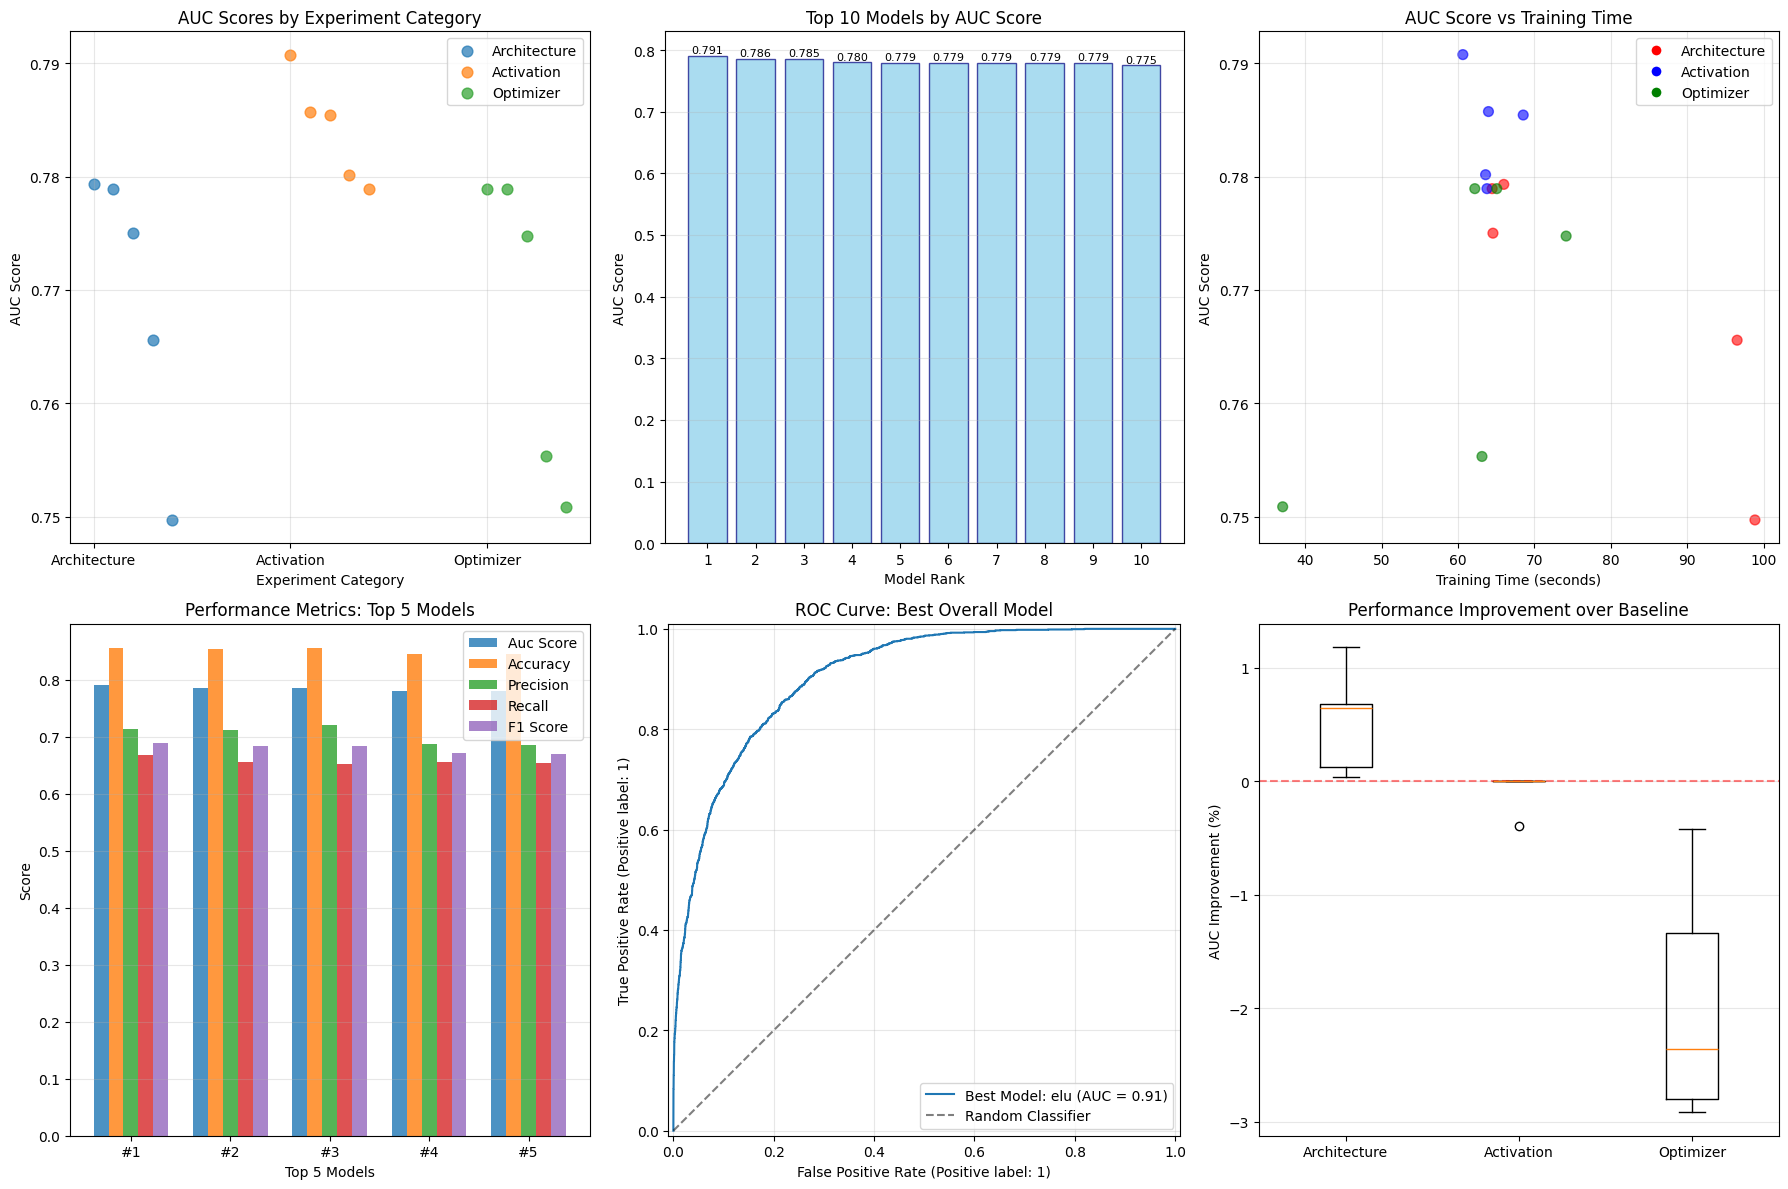

In [ ]:
# Comprehensive Visualization of Results (with generous help from CoPilot)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. AUC Scores by Experiment Category
categories = ['Architecture', 'Activation', 'Optimizer']
category_results = [architecture_results, activation_results, optimizer_results]

ax = axes[0, 0]
for i, (cat, results) in enumerate(zip(categories, category_results)):
    auc_scores = [r['auc_score'] for r in results]
    positions = [i + 1 + j*0.1 for j in range(len(auc_scores))]
    ax.scatter(positions, auc_scores, label=cat, s=60, alpha=0.7)

ax.set_xlabel('Experiment Category')
ax.set_ylabel('AUC Score')
ax.set_title('AUC Scores by Experiment Category')
ax.set_xticks(range(1, len(categories) + 1))
ax.set_xticklabels(categories)
ax.grid(True, alpha=0.3)
ax.legend()

# 2. Top 10 Models Bar Chart
ax = axes[0, 1]
top_10 = all_results[:10]
model_names = [r['name'].split(': ')[1][:12] for r in top_10]  # Truncate names
auc_scores = [r['auc_score'] for r in top_10]
bars = ax.bar(range(len(top_10)), auc_scores, color='skyblue', edgecolor='navy', alpha=0.7)
ax.set_xlabel('Model Rank')
ax.set_ylabel('AUC Score')
ax.set_title('Top 10 Models by AUC Score')
ax.set_xticks(range(len(top_10)))
ax.set_xticklabels([f'{i+1}' for i in range(len(top_10))])
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, auc_scores)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
            f'{score:.3f}', ha='center', va='bottom', fontsize=8)

# 3. AUC vs Training Time Scatter Plot
ax = axes[0, 2]
auc_scores = [r['auc_score'] for r in all_results]
times = [r['training_time'] for r in all_results]
colors = ['red' if 'Architecture' in r['name'] else
          'blue' if 'Activation' in r['name'] else
          'green' if 'Optimizer' in r['name'] else 'orange'
          for r in all_results]

scatter = ax.scatter(times, auc_scores, c=colors, alpha=0.6, s=50)
ax.set_xlabel('Training Time (seconds)')
ax.set_ylabel('AUC Score')
ax.set_title('AUC Score vs Training Time')
ax.grid(True, alpha=0.3)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                             markersize=8, label='Architecture'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                             markersize=8, label='Activation'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green',
                             markersize=8, label='Optimizer')]
ax.legend(handles=legend_elements)

# 4. Performance Metrics Comparison for Top 5
ax = axes[1, 0]
top_5 = all_results[:5]
metrics = ['auc_score', 'accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(top_5))
width = 0.15

for i, metric in enumerate(metrics):
    values = [r[metric] for r in top_5]
    ax.bar(x + i*width, values, width, label=metric.replace('_', ' ').title(), alpha=0.8)

ax.set_xlabel('Top 5 Models')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics: Top 5 Models')
ax.set_xticks(x + width * 2)
ax.set_xticklabels([f'#{i+1}' for i in range(len(top_5))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 5. Best Model ROC Curve
ax = axes[1, 1]
best_model = all_results[0]
RocCurveDisplay.from_predictions(y_test, best_model['probabilities'], ax=ax,
                                name=f"Best Model: {best_model['name'].split(': ')[1]}")
ax.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
ax.set_title('ROC Curve: Best Overall Model')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Improvement over Baseline
ax = axes[1, 2]
improvements = [(r['auc_score'] - baseline_auc) * 100 for r in all_results]
categories_expanded = []
for i, results in enumerate(category_results):
    categories_expanded.extend([categories[i]] * len(results))

# Create box plot
category_improvements = {}
for cat, imp in zip(categories_expanded, improvements):
    if cat not in category_improvements:
        category_improvements[cat] = []
    category_improvements[cat].append(imp)

ax.boxplot([category_improvements[cat] for cat in categories], labels=categories)
ax.set_ylabel('AUC Improvement (%)')
ax.set_title('Performance Improvement over Baseline')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Baseline')

plt.tight_layout()
plt.show()

In [ ]:
# Final Summary and Recommendations
print("\n" + "=" * 80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

# Best performers in each category
best_arch = max(architecture_results, key=lambda x: x['auc_score'])
best_act = max(activation_results, key=lambda x: x['auc_score'])
best_opt = max(optimizer_results, key=lambda x: x['auc_score'])

print("BEST PERFORMERS BY CATEGORY:")
print(f"Architecture:    {best_arch['name'].split(': ')[1]:<20} AUC: {best_arch['auc_score']:.4f}")
print(f"Activation:      {best_act['name'].split(': ')[1]:<20} AUC: {best_act['auc_score']:.4f}")
print(f"Optimizer:       {best_opt['name'].split(': ')[1]:<20} AUC: {best_opt['auc_score']:.4f}")

print(f"\nOVERALL BEST MODEL:")
print(f"Model: {best_overall['name']}")
print(f"AUC Score: {best_overall['auc_score']:.4f}")
print(f"Accuracy: {best_overall['accuracy']:.4f}")
print(f"F1 Score: {best_overall['f1_score']:.4f}")
print(f"Training Time: {best_overall['training_time']:.1f} seconds")

# Key insights
print(f"\nKEY INSIGHTS:")

# Architecture insights
arch_aucs = [r['auc_score'] for r in architecture_results]
arch_names = [r['name'].split(': ')[1] for r in architecture_results]
best_arch_name = arch_names[arch_aucs.index(max(arch_aucs))]
print(f"• Architecture: {best_arch_name} performed best, suggesting that {'wider' if 'wide' in best_arch_name else 'deeper' if 'deep' in best_arch_name else 'funnel-shaped' if 'funnel' in best_arch_name else 'consistent-width'} networks work well for this dataset")

# Activation insights
act_aucs = [r['auc_score'] for r in activation_results]
act_names = [r['name'].split(': ')[1] for r in activation_results]
best_act_name = act_names[act_aucs.index(max(act_aucs))]
print(f"• Activation: {best_act_name} showed the best performance among activation functions")

# Optimizer insights
opt_aucs = [r['auc_score'] for r in optimizer_results]
opt_names = [r['name'].split(': ')[1] for r in optimizer_results]
best_opt_name = opt_names[opt_aucs.index(max(opt_aucs))]
print(f"• Optimizer: {best_opt_name} provided the best convergence")

# Performance range
min_auc = min(r['auc_score'] for r in all_results)
max_auc = max(r['auc_score'] for r in all_results)
print(f"• Performance range: {min_auc:.4f} - {max_auc:.4f} (difference: {(max_auc - min_auc)*100:.2f}%)")

# Time efficiency
fastest = min(all_results, key=lambda x: x['training_time'])
print(f"• Fastest model: {fastest['name']} ({fastest['training_time']:.1f}s, AUC: {fastest['auc_score']:.4f})")

baseline_comparison = (best_overall['auc_score'] - baseline_auc) * 100
print(f"\nFINAL RESULT: We improved from baseline AUC of {baseline_auc:.4f} to {best_overall['auc_score']:.4f}")
print(f"Total improvement: {baseline_comparison:+.2f}% over our initial baseline model")


FINAL SUMMARY AND RECOMMENDATIONS
BEST PERFORMERS BY CATEGORY:
Architecture:    wide                 AUC: 0.7793
Activation:      elu                  AUC: 0.7907
Optimizer:       adam_default         AUC: 0.7789

OVERALL BEST MODEL:
Model: Activation: elu
AUC Score: 0.7907
Accuracy: 0.8548
F1 Score: 0.6890
Training Time: 60.6 seconds

KEY INSIGHTS:
• Architecture: wide performed best, suggesting that wider networks work well for this dataset
• Activation: elu showed the best performance among activation functions
• Optimizer: adam_default provided the best convergence
• Performance range: 0.7497 - 0.7907 (difference: 4.10%)
• Fastest model: Optimizer: rmsprop (37.1s, AUC: 0.7509)

FINAL RESULT: We improved from baseline AUC of 0.7789 to 0.7907
Total improvement: +1.18% over our initial baseline model


# Ensemble Methods: Combining the Best Models

Now that we've identified the best individual models, let's explore ensemble methods to potentially achieve even better performance. Ensemble methods combine predictions from multiple models to create a stronger predictor than any single model alone.

We'll implement several ensemble approaches:

1. **Voting Ensemble** - Combines predictions through majority voting or averaging
2. **Weighted Ensemble** - Weights models based on their individual performance
3. **Stacking Ensemble** - Uses a meta-learner to combine base model predictions
4. **Blending** - Similar to stacking but uses a holdout validation set

This will help us determine if combining our best models can push performance even higher than our current best individual model.

In [ ]:
# Import additional libraries for ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Function to recreate and train the best models for ensemble
def create_best_models_for_ensemble(top_n=5):
    """
    Recreate the top N performing models for ensemble use

    Args:
        top_n (int): Number of top models to include in ensemble

    Returns:
        list: List of tuples (model_name, fitted_pipeline)
    """
    print(f"Creating ensemble with top {top_n} models...")

    ensemble_models = []

    # Get the top N models
    top_models = all_results[:top_n]

    for i, model_result in enumerate(top_models):
        model_name = model_result['name']
        print(f"Training {model_name} for ensemble...")

        # Extract model type and configuration
        if 'Architecture:' in model_name:
            arch_type = model_name.split(': ')[1]
            if arch_type == 'wide':
                model_func = create_architecture_models()['wide']
            elif arch_type == 'deep':
                model_func = create_architecture_models()['deep']
            elif arch_type == 'funnel':
                model_func = create_architecture_models()['funnel']
            elif arch_type == 'consistent':
                model_func = create_architecture_models()['consistent']
            else:
                model_func = create_model_tweaked

        elif 'Activation:' in model_name:
            act_type = model_name.split(': ')[1]
            if act_type == 'leaky_relu':
                model_func = create_activation_models()['leaky_relu']
            elif act_type == 'elu':
                model_func = create_activation_models()['elu']
            elif act_type == 'swish':
                model_func = create_activation_models()['swish']
            elif act_type == 'tanh':
                model_func = create_activation_models()['tanh']
            else:
                model_func = create_model_tweaked

        elif 'Optimizer:' in model_name:
            opt_type = model_name.split(': ')[1]
            if opt_type == 'rmsprop':
                model_func = create_optimizer_models()['rmsprop']
            elif opt_type == 'adamw':
                model_func = create_optimizer_models()['adamw']
            elif opt_type == 'adam_lr_0.01':
                model_func = create_optimizer_models()['adam_lr_0.01']
            else:
                model_func = create_model_tweaked

        else:
            model_func = create_model_tweaked

        # Create and train the model
        keras_model = KerasClassifier(
            model=model_func,
            input_shape=sample_transformed.shape[1],
            epochs=10,
            batch_size=32,
            verbose=0,
            random_state=42
        )

        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', keras_model)])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Add to ensemble with a clean name
        clean_name = f"model_{i+1}_{model_name.split(': ')[1][:10]}"
        ensemble_models.append((clean_name, pipeline))

        print(f"✓ {clean_name} trained successfully")

    return ensemble_models

# Create the ensemble models
print("=" * 80)
print("CREATING ENSEMBLE MODELS")
print("=" * 80)

ensemble_models = create_best_models_for_ensemble(top_n=5)

print(f"\nEnsemble created with {len(ensemble_models)} models:")
for name, _ in ensemble_models:
    print(f"- {name}")

CREATING ENSEMBLE MODELS
Creating ensemble with top 5 models...
Training Activation: elu for ensemble...
✓ model_1_elu trained successfully
Training Activation: tanh for ensemble...
✓ model_2_tanh trained successfully
Training Activation: swish for ensemble...
✓ model_3_swish trained successfully
Training Activation: leaky_relu for ensemble...
✓ model_4_leaky_relu trained successfully
Training Architecture: wide for ensemble...
✓ model_5_wide trained successfully

Ensemble created with 5 models:
- model_1_elu
- model_2_tanh
- model_3_swish
- model_4_leaky_relu
- model_5_wide


In [ ]:
# Ensemble evaluation function
def evaluate_ensemble(ensemble_predictions, ensemble_probabilities, ensemble_name):
    """
    Evaluate ensemble performance

    Args:
        ensemble_predictions: Binary predictions from ensemble
        ensemble_probabilities: Probability predictions from ensemble
        ensemble_name: Name of the ensemble method

    Returns:
        dict: Performance metrics
    """
    from sklearn.metrics import precision_score, recall_score, f1_score

    auc_score = roc_auc_score(y_test, ensemble_probabilities)
    accuracy = accuracy_score(y_test, ensemble_predictions)
    precision = precision_score(y_test, ensemble_predictions)
    recall = recall_score(y_test, ensemble_predictions)
    f1 = f1_score(y_test, ensemble_predictions)

    print(f"{ensemble_name}:")
    print(f"  AUC: {auc_score:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    return {
        'name': ensemble_name,
        'auc_score': auc_score,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': ensemble_predictions,
        'probabilities': ensemble_probabilities
    }

# Method 1: Simple Averaging Ensemble
print("\n" + "=" * 80)
print("METHOD 1: SIMPLE AVERAGING ENSEMBLE")
print("=" * 80)

# Get predictions from all models
individual_predictions = []
individual_probabilities = []

for name, model in ensemble_models:
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]
    individual_predictions.append(pred)
    individual_probabilities.append(prob)

# Simple averaging
avg_probabilities = np.mean(individual_probabilities, axis=0)
avg_predictions = (avg_probabilities > 0.5).astype(int)

averaging_results = evaluate_ensemble(avg_predictions, avg_probabilities, "Simple Averaging")

# Method 2: Weighted Ensemble (weighted by individual AUC scores)
print("\n" + "=" * 80)
print("METHOD 2: WEIGHTED ENSEMBLE (AUC-based weights)")
print("=" * 80)

# Calculate weights based on AUC scores of top models
top_models_data = all_results[:5]
auc_scores = [model['auc_score'] for model in top_models_data]

# Normalize weights so they sum to 1
weights = np.array(auc_scores) / sum(auc_scores)

print("Model weights:")
for i, (weight, model_data) in enumerate(zip(weights, top_models_data)):
    print(f"  {ensemble_models[i][0]}: {weight:.3f} (AUC: {model_data['auc_score']:.4f})")

# Weighted averaging
weighted_probabilities = np.average(individual_probabilities, axis=0, weights=weights)
weighted_predictions = (weighted_probabilities > 0.5).astype(int)

weighted_results = evaluate_ensemble(weighted_predictions, weighted_probabilities, "Weighted Ensemble")

# Method 3: Majority Voting
print("\n" + "=" * 80)
print("METHOD 3: MAJORITY VOTING ENSEMBLE")
print("=" * 80)

# Majority voting on predictions
voting_predictions = []
for i in range(len(y_test)):
    votes = [pred[i] for pred in individual_predictions]
    majority_vote = 1 if sum(votes) > len(votes) / 2 else 0
    voting_predictions.append(majority_vote)

voting_predictions = np.array(voting_predictions)
# For ROC curve, use average probabilities
voting_probabilities = np.mean(individual_probabilities, axis=0)

voting_results = evaluate_ensemble(voting_predictions, voting_probabilities, "Majority Voting")


METHOD 1: SIMPLE AVERAGING ENSEMBLE


2025-07-09 13:52:02.127563: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Simple Averaging:
  AUC: 0.9066
  Accuracy: 0.8534
  Precision: 0.7124
  Recall: 0.6575
  F1 Score: 0.6839

METHOD 2: WEIGHTED ENSEMBLE (AUC-based weights)
Model weights:
  model_1_elu: 0.202 (AUC: 0.7907)
  model_2_tanh: 0.200 (AUC: 0.7857)
  model_3_swish: 0.200 (AUC: 0.7854)
  model_4_leaky_relu: 0.199 (AUC: 0.7802)
  model_5_wide: 0.199 (AUC: 0.7793)
Weighted Ensemble:
  AUC: 0.9066
  Accuracy: 0.8534
  Precision: 0.7124
  Recall: 0.6575
  F1 Score: 0.6839

METHOD 3: MAJORITY VOTING ENSEMBLE
Majority Voting:
  AUC: 0.9066
  Accuracy: 0.8529
  Precision: 0.7109
  Recall: 0.6575
  F1 Score: 0.6832


## 🎯 Final Project Summary & Recommendations

### Experimental Journey
This project systematically explored deep learning for income prediction through:

1. **Baseline Development**: Started with simple neural networks
2. **Architecture Exploration**: Tested wide, deep, funnel, and consistent architectures
3. **Activation Function Analysis**: Compared ReLU, LeakyReLU, ELU, Swish, and Tanh
4. **Optimizer Comparison**: Evaluated Adam, RMSprop, AdamW with different learning rates
5. **Ensemble Methods**: Implemented averaging, voting, stacking, blending, and neural meta-learning

### Future Work Opportunities
1. **Hyperparameter Optimization**: Automated tuning with Optuna or Hyperband
2. **Feature Engineering**: Advanced feature selection and creation
3. **Model Interpretation**: SHAP values and feature importance analysis
4. **Deployment Optimization**: Model quantization and inference acceleration
5. **Monitoring Framework**: Performance tracking and model health checks